<a href="https://colab.research.google.com/github/simodepth/Meta-Tags-Analysis/blob/main/SEO_Meta_Titles_Analysis_with_NLP_Transformers_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing SEO Meta Titles with NLP Transformers in Python


---

In this Python framework we're going to leverage NLP and Python to count words from your SEO meta titles or descriptions to match the words contained in the search queries. 

However, this script is advanced enough to **compare the meaning of the meta title vs the meaning of the search query**.

This way you can immediately get a grasp on the underlying Search Intent behind a query and learn whether the meta tags  achieve this goal in their proposition.



#Requirements & Assumptions



---

- Crawl your site with Screaming Frog > export Meta Descripton/Title Links > remove all columns except for "Address" and "Meta Description 1" OR "title 1" > Rename "address" as "URL" > Download as xlsx or CSV > Upload on Colab through Pandas
- Export your Search Console Data as XLSX > Only keep the Query tab > Upload the dataframe in Colab through Pandas

#Used Libraries


---

- Pandas : this will be important for the dataframe
- re : this module will check if word is a substring of another word
- nltk : this is a general module for natural language processing, we will use the wordtokenizer function to split a sentence in words
- stop_words : this will make a list of stop words (and, or, this, …) which we don’t want to use in our meta title analysis
- snowballstemmer: this module will stem verbs and transform nouns to their short form (e.g. becoming -> becom)
- Levenshtein : a module to calculate edit distance between 2 strings. E.g. eagle and eegle differ by 1 token, so the levenshtein distance is 1.
- Datetime: for calculating dates

In [ ]:
!pip install searchconsole
!pip install stop_words
!pip install Levenshtein
!pip install datetime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import searchconsole
import re
import nltk
from stop_words import get_stop_words
from nltk.stem.snowball import SnowballStemmer
from Levenshtein import *
from datetime import datetime

In [ ]:
#@title Import Meta Descriptions from Screaming Frog
dffrog = pd.read_csv('/content/meta_description_all - Sheet1.csv')#@param {type:"string"}
dftitles = dffrog[["URL","Meta Description 1"]]

In [ ]:
#@title Import Search Queries from GSC
dfconsole = pd.read_excel('/content/Balenciaga top queries.xlsx')#@param {type:"string"}
dftitles = dfconsole[['Top queries','Clicks','Impressions','CTR','Position']]

In [ ]:
#@title Merge the Meta Descriptions w/ Search Queries
df = pd.concat([dffrog,dfconsole], axis=1)
df

,URL,Meta Description 1,Top queries,Clicks,Impressions,CTR,Position
0,https://www.balenciaga.com/en-gb/bb-stretch-be...,Shop the women's bb stretch belt in beige at ...,balenciaga,2683305.0,18335608.0,0.1463,1.16
1,https://www.balenciaga.com/en-nl/army-small-to...,Shop the men's army small tote bag in black at...,balenciaga shoes,235934.0,3259875.0,0.0724,1.34
2,https://www.balenciaga.com/en-nl/bb-key-neckla...,Shop the bb key necklace in silver at the Bal...,バレンシアガ,215741.0,1033109.0,0.2088,1.00
3,https://www.balenciaga.com/ja-jp/paris-high-to...,Balenciaga jp 公式オンラインブティックで黒の paris high top ス...,balenciaga bag,102150.0,1163610.0,0.0878,1.13
4,https://www.balenciaga.com/fr-fr/homme/petite-...,Découvrez la dernière collection de essential ...,バレンシアガ 財布,99343.0,371258.0,0.2676,1.02
...,...,...,...,...,...,...,...
13486,https://www.balenciaga.com/en-gb/runner-traine...,Shop the men's runner trainers in white at the...,NaN,NaN,NaN,NaN,NaN
13487,https://www.balenciaga.com/ja-jp/メンズ/ウェア/スイムウェア,Shop the latest collection of スイムウェア for men a...,NaN,NaN,NaN,NaN,NaN
13488,https://www.balenciaga.com/ko-kr/2019-봄,Balenciaga,NaN,NaN,NaN,NaN,NaN
13489,https://www.balenciaga.com/fr-be/femme/accesso...,Découvrez la dernière collection de objects po...,NaN,NaN,NaN,NaN,NaN


In [ ]:
#@title Drop the unwanted columns
df2=df.dropna()
df2.drop(['URL', 'Clicks', 'Impressions', 'CTR', 'Position'], axis=1, inplace=True)
df2

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Meta Description 1,Top queries
0,Shop the women's bb stretch belt in beige at ...,balenciaga
1,Shop the men's army small tote bag in black at...,balenciaga shoes
2,Shop the bb key necklace in silver at the Bal...,バレンシアガ
3,Balenciaga jp 公式オンラインブティックで黒の paris high top ス...,balenciaga bag
4,Découvrez la dernière collection de essential ...,バレンシアガ 財布
...,...,...
995,Borsa tote army medium da uomo in grigio. Scop...,バレンシアガ帽子
996,Balenciaga,balenciaga cabas
997,Shop the latest collection of underwear for wo...,buzo balenciaga
998,Veste à manches teddy pour femme en noir. Déco...,balenciaga kids clothes


In [ ]:
#@title Rename Columns in Bulk
cols = ['Meta Titles', 'Search Query']
df2.columns = cols
df2

,Meta Titles,Search Query
0,Shop the women's bb stretch belt in beige at ...,balenciaga
1,Shop the men's army small tote bag in black at...,balenciaga shoes
2,Shop the bb key necklace in silver at the Bal...,バレンシアガ
3,Balenciaga jp 公式オンラインブティックで黒の paris high top ス...,balenciaga bag
4,Découvrez la dernière collection de essential ...,バレンシアガ 財布
...,...,...
995,Borsa tote army medium da uomo in grigio. Scop...,バレンシアガ帽子
996,Balenciaga,balenciaga cabas
997,Shop the latest collection of underwear for wo...,buzo balenciaga
998,Veste à manches teddy pour femme en noir. Déco...,balenciaga kids clothes


#Counting words in query
Here we use the NLTK word_tokenize function to split the query in words. Thus will return a list of words, we will exclude the stop words (like and, or, the) from this list and return the number of words in the query.

In [ ]:
def number_words_query(query):
  try:
    querywords = nltk.word_tokenize(str(query).lower())
    stop_words = get_stop_words('en')
    not_stop_words=[]
    
    for word in querywords:
      if(word not in stop_words):
        not_stop_words.append(word)
        querylength = len(not_stop_words)
        
  except:
   querylength=1
  return querylength

#Counting words of query in title
This python function will first stem the words in query and in title. For every stem word in the query it will check if the stem is present in the meta title. We also use the levenhstein distance to not take into account possible spelling errors.

We return the number words in the query used by the visitor

In [ ]:
def number_words_title(query,title,intitle):
 try:
  stemmer = SnowballStemmer('english', ignore_stopwords=True)
  wordsintitle=0
  titlewords = nltk.word_tokenize(str(title).lower())
  stemtitlewords = [stemmer.stem(word) for word in titlewords]
  querywords = nltk.word_tokenize(str(query).lower()) 
  stemquerywords = [stemmer.stem(word) for word in querywords]
  stop_words = get_stop_words('en')
  titlewordsnospaces=title.replace(' ','').lower()
  titlewordsnosigns = re.sub(r'\W+', '', titlewordsnospaces)
  distanceword=0 
  for word in stemquerywords:
   if(word not in stop_words):
    if(word in titlewordsnospaces or word in titlewordsnosigns):
     wordsintitle=wordsintitle+1 
   else:
    for word2 in stemtitlewords:
     distanceword = distance(str(word),str(word2))
     procentdistance = distanceword/(len(word)+len(word2)/2)
     if distanceword<1 or procentdistance<0.15:
      wordsintitle=wordsintitle+1
 except: 
  wordsintitle=1
 return wordsintitle

#Executing functions
We use lambda-functions to create new columns in the dataframe with the following code

In [ ]:
df2['numberwordsintitle'] = df2.apply(lambda x: number_words_title(x['Search Query'],x['Meta Titles'],True),axis=1) 
df2['numberwordsinquery'] = df2.apply(lambda x: number_words_query(x['Search Query']),axis=1)
df2['numberwords'] = df2.apply(lambda x: number_words_query(x['Meta Titles']),axis=1)  

df2.to_csv("titlesanalysis.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In the resulting CSV-file you can find for every query the amount of words in the title.
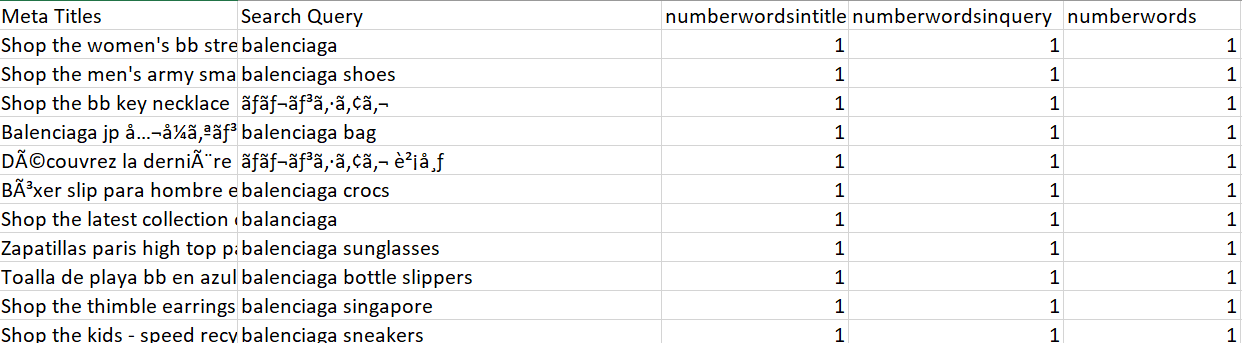

If you filter for the queries with 0 words in title, you can immediately start optimizing your meta titles.

## ❌ WARNING ❌
#THE OVERALL WORD COUNT PROCESS IS CLEARLY MISTAKEN - WORK IN PROGRESS

In [ ]:
#@title Install and Import Transformers libraries
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Writing the similarity function.
 

---


First, we will encode the sentence (keyword/meta title).**This will translate the sentence into huge vectors of numbers**.

I will **calculate the distance between these two word embeddings/vectors**. The more the vectors are different from each other, the higher the distance.

In other words, **the closer the similarity score to 1, the more similarity between meta titles and search queries**

In [ ]:
from scipy import spatial
import numpy as np
def get_similarity(query,title):
    embeddings = model.encode([query,title])
    result = 1 - spatial.distance.cosine(embeddings[0], embeddings[1])
    return result

In [ ]:
#@title Make a new similarity column in our dataframe.
df2["Similarity"]=df2.apply(lambda x:get_similarity(x["Search Query"],x["Meta Titles"]),axis=1)
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Meta Titles,Search Query,numberwordsintitle,numberwordsinquery,numberwords,Similarity
0,Shop the women's bb stretch belt in beige at ...,balenciaga,1,1,1,0.577424
1,Shop the men's army small tote bag in black at...,balenciaga shoes,1,1,1,0.558659
2,Shop the bb key necklace in silver at the Bal...,バレンシアガ,1,1,1,0.160509
3,Balenciaga jp 公式オンラインブティックで黒の paris high top ス...,balenciaga bag,1,1,1,0.358185
4,Découvrez la dernière collection de essential ...,バレンシアガ 財布,1,1,1,0.107623
...,...,...,...,...,...,...
995,Borsa tote army medium da uomo in grigio. Scop...,バレンシアガ帽子,1,1,1,0.129936
996,Balenciaga,balenciaga cabas,1,1,1,0.921017
997,Shop the latest collection of underwear for wo...,buzo balenciaga,1,1,1,0.586611
998,Veste à manches teddy pour femme en noir. Déco...,balenciaga kids clothes,1,1,1,0.497903


In [ ]:
from google.colab import files
df2.to_csv('similarity-keywords.csv')
files.download('similarity-keywords.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>